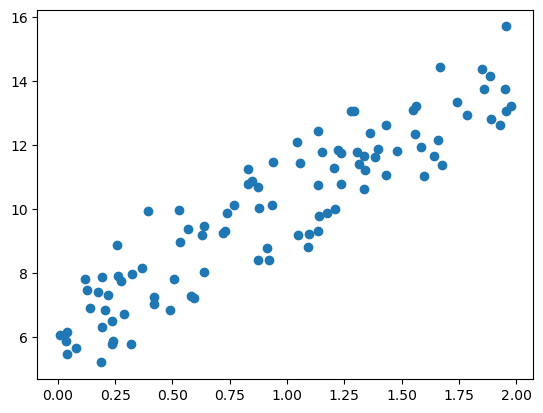

In [1]:
# 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
# 일반 선형 회귀 / 릿지 / 라쏘 / 엘라스틱넷 / 로지스틱 회귀
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6을 근사 (w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 + 4* X + np.random.randn(100,1)

# X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [2]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [3]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 개선
    y_pred = np.dot(X,w1.T) + w0
    diff = y-y_pred
    
    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    #w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이터 적용함,
def gradient_descent_steps(X,y,iters = 10000):
    #w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1,w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1,w0    

In [5]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1,w0 = gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


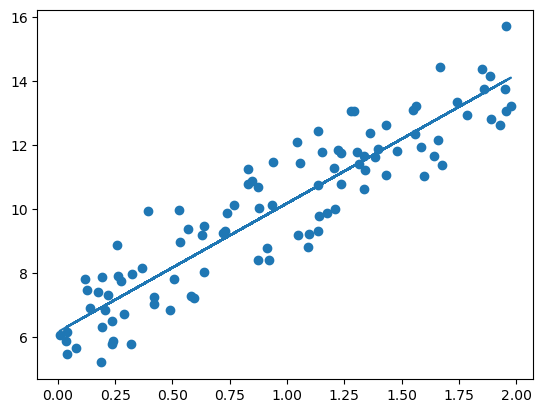

In [6]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [7]:
def stochastic_gradient_descent_steps(X,y,batch_size = 10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    prev_cost = 10000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(iters)
        # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y, learning_rate =0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0    

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X,y, iters=1000)
print("w1:",round(w1[0,0],3), "w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 3.303 w0: 7.146
Stochastic Gradient Descent Total Cost:1.2267


## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# boston 데이터 세트 로드
boston = pd.read_csv('boston.csv')

# boston 데이터 세트 DataFrame 변환
#bostonDF = pd.DataFrame(boston, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
y_target = boston['PRICE'] 
#print('Boston 데이터 세트 크기: ',boston.shape)
#boston.head()


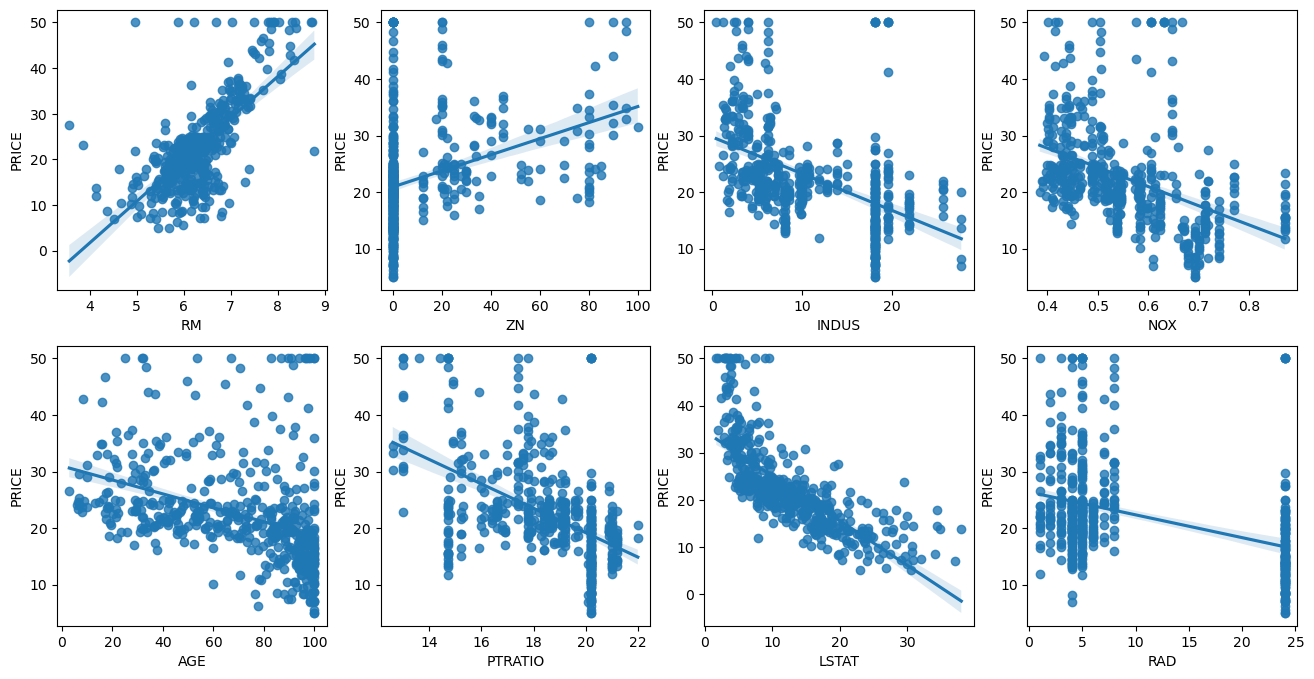

In [10]:
fix,axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE',data=boston, ax=axs[row][col])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target = boston['PRICE']
X_data = boston.drop(['PRICE'],axis = 1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,test_size=0.3,random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 13.483, RMSE : 3.672
Variance score : 0.811


In [12]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편 값: 42.27785430272317
회귀 계수값: [ -0.1  -0.    0.1   2.4 -16.6   0.7  -0.   -0.9   0.2  -0.   -0.5   0.
  -0.5  13. ]


In [13]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

CAT. MEDV    13.0
CHAS          2.4
RM            0.7
RAD           0.2
INDUS         0.1
ZN           -0.0
AGE          -0.0
TAX          -0.0
B             0.0
CRIM         -0.1
PTRATIO      -0.5
LSTAT        -0.5
DIS          -0.9
NOX         -16.6
dtype: float64

In [14]:
from sklearn.model_selection import cross_val_score

y_target = boston['PRICE']
X_data = boston.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print(' 5 folds 의 개별 RMSE scores:',np.round(rmse_scores,2))
print(' 5 folds 의 개별 RMSE :',np.round(avg_rmse,2))

 5 folds 의 개별 Negative MSE scores: [ -6.54 -15.62 -23.68 -44.52 -16.45]
 5 folds 의 개별 RMSE scores: [2.56 3.95 4.87 6.67 4.06]
 5 folds 의 개별 RMSE : 4.42


In [15]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]] 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [16]:
def polynomial_func(X):
    y = 1 + 2 * X[:,0] + 3 * X[:,0]**2 + 4 * X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [17]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n',np.round(model.coef_,2))
print('Polynomial 회귀 Shape:',model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+ 2*X[:,0] + 3*X[:,0] + 4*X[:,1]**3
    return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),
                 ('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.17 0.17 0.34 0.51 0.68 0.68 1.03 1.54 2.23]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값으로 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.40772896250986845입니다.

Degree 4회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.0432087498723184입니다.

Degree 15회귀 계수는 [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08]입니다.
Degree 15 MSE는 182581084.8263125입니다.


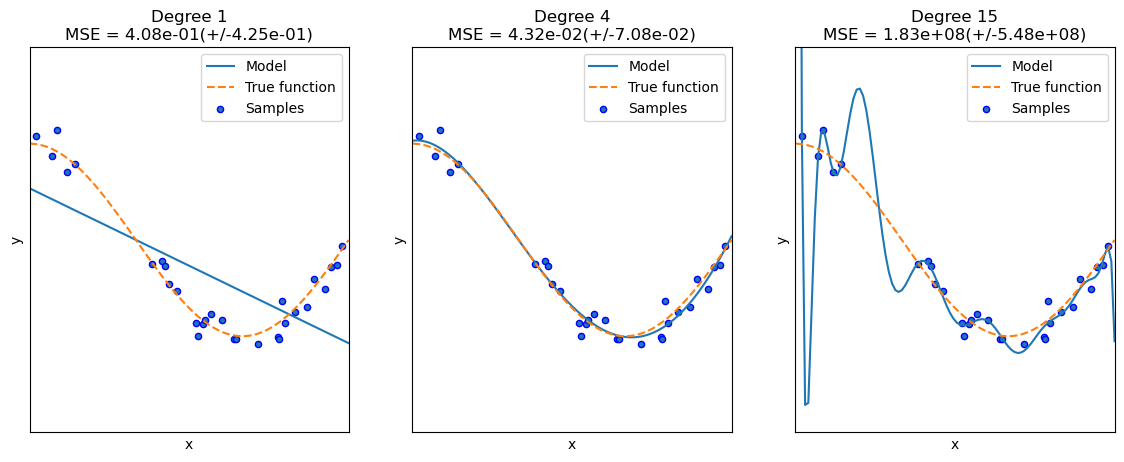

In [20]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees), i+1)
    plt.setp(ax,xticks=(),yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree = degrees[i],include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features",polynomial_features),
                        ("linear_regression",linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring = "neg_mean_squared_error",cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_step['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0}회귀 계수는 {1}입니다.'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0} MSE는 {1}입니다.'.format(degrees[i],-1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]),label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test),'--',label = "True function")
    plt.scatter(X,y,edgecolor = 'b',s=20,label = "Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)) ; plt.ylim((-2,2));plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/-{:.2e})".format(degrees[i],-scores.mean(), scores.std()))

plt.show()    
    

### 릿지 회귀

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data , y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores:',np.round(neg_mse_scores,3))
print(' 5 folds 의 개별 RMSE scores:',np.round(rmse_scores,3))
print(' 5 folds 의 개별 RMSE :{0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores: [ -5.963 -13.81  -20.109 -48.466 -16.97 ]
 5 folds 의 개별 RMSE scores: [2.442 3.716 4.484 6.962 4.119]
 5 folds 의 개별 RMSE :4.345


In [22]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0,0.1,1,10,100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha=alpha)
    
    #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge,X_data,y_target, scoring="neg_mean_squared_error",cv=5)
    avg_rmse =np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE: 4.421
alpha 0.1 일 때 5 folds의 평균 RMSE: 4.392
alpha 1 일 때 5 folds의 평균 RMSE: 4.316
alpha 10 일 때 5 folds의 평균 RMSE: 4.345
alpha 100 일 때 5 folds의 평균 RMSE: 4.832


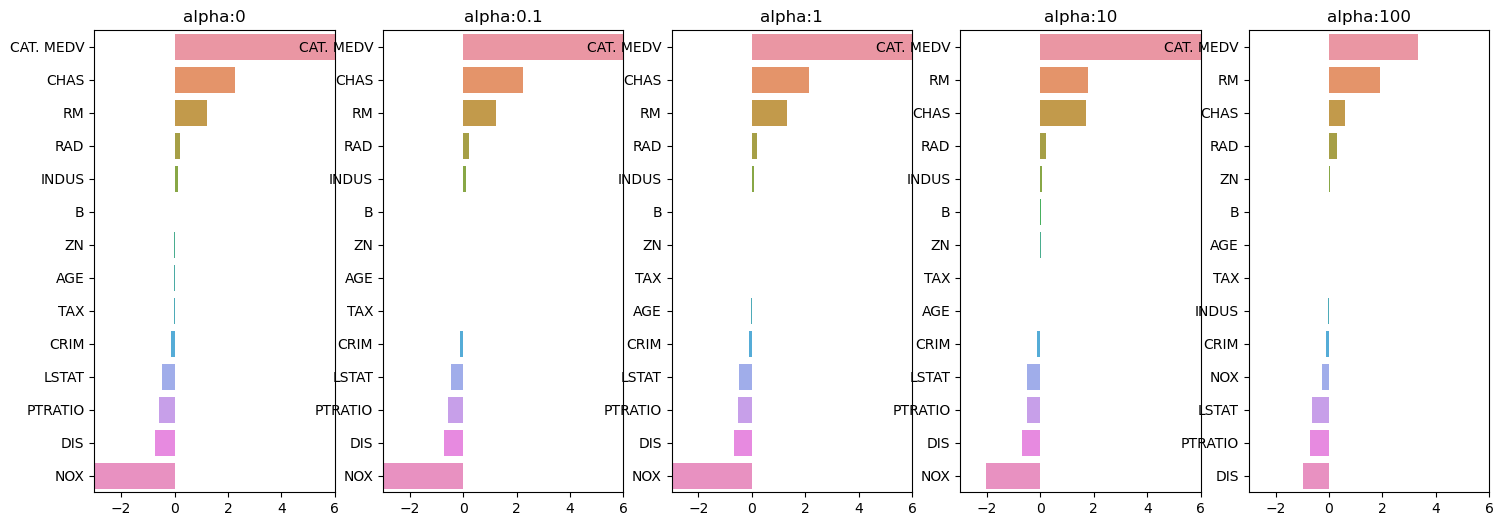

In [23]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig,axs =plt.subplots(figsize=(18,6),nrows = 1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data,y_target)
    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index,ax=axs[pos])
    
# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [24]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
CAT. MEDV,11.692178,11.669082,11.429285,9.205450,3.337154
CHAS,2.245550,2.232435,2.142274,1.694427,0.603716
RM,1.203226,1.216730,1.312558,1.771785,1.899950
RAD,0.219067,0.217117,0.207525,0.212277,0.284431
INDUS,0.118768,0.114834,0.092426,0.044412,-0.019271
B,0.007245,0.007297,0.007600,0.008380,0.008957
ZN,-0.004998,-0.004778,-0.003052,0.008236,0.038625
AGE,-0.008332,-0.009117,-0.013287,-0.017021,-0.003353
TAX,-0.009133,-0.009209,-0.009672,-0.011161,-0.014573
CRIM,-0.119184,-0.118718,-0.116097,-0.111087,-0.105653


### 라쏘 회귀 

In [25]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None,
                       verbose = True, return_coeff = True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha = param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error",cv=5)
        avg_rmse = np.mean(np.sqrt(-1* neg_mse_scores))
        print('alpha {0} 일 때 5 폴드 세트의 평균 RMSE:{1:.3f}'.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출.
        model.fit(X_data_n,y_target_n)
        if return_coeff :
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index = X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df        
# end of get_linear_regre_eval            

In [26]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)
#0.07 일 때 가장 좋음

####### Lasso #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE:4.370
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:4.380
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE:4.699
alpha 1 일 때 5 폴드 세트의 평균 RMSE:5.589
alpha 3 일 때 5 폴드 세트의 평균 RMSE:6.189


In [27]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CAT. MEDV,11.173666,10.885943,6.784805,1.759151,0.000000
RM,1.255642,1.232875,0.915217,0.538166,0.000000
CHAS,1.053520,0.593127,0.000000,0.000000,0.000000
RAD,0.192483,0.196566,0.214002,0.247441,0.061864
INDUS,0.053735,0.051441,0.000000,-0.000000,-0.000000
B,0.008087,0.008132,0.008006,0.007865,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
ZN,-0.000179,0.000525,0.017823,0.040903,0.037231
TAX,-0.010715,-0.010901,-0.011624,-0.014183,-0.008602
AGE,-0.017321,-0.015497,0.000866,0.020225,0.042495


### 엘라스틱넷 회귀

In [28]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval()함수 호출
#l1_ratio는 0.7로 고정
elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params = elastic_alphas,X_data_n = X_data, y_target_n=y_target)

####### ElasticNet #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE:4.382
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:4.431
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE:4.986
alpha 1 일 때 5 폴드 세트의 평균 RMSE:5.409
alpha 3 일 때 5 폴드 세트의 평균 RMSE:6.068


In [29]:
# 반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CAT. MEDV,8.725996,7.806012,2.828224,1.070744,0.000000
RM,1.744716,1.822812,1.505935,0.819641,0.000000
CHAS,1.100234,0.796856,0.000000,0.000000,0.000000
RAD,0.213084,0.222500,0.273986,0.275836,0.146846
INDUS,0.030961,0.022063,-0.000000,-0.000000,-0.000000
ZN,0.010646,0.014979,0.039361,0.046595,0.038268
B,0.008531,0.008656,0.008702,0.008174,0.007020
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
TAX,-0.011589,-0.012007,-0.014833,-0.015455,-0.011417
AGE,-0.015902,-0.013642,0.004375,0.018845,0.043446


In [30]:
# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
def get_scaled_data(method='None',p_degree=None, input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None :
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias = False).fit_transform(scaled_data)
    return scaled_data    

In [31]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출,
alphas = [0.1,1,10,100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준 정규 분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그변환
scale_methods = [(None, None),('Standard',None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0],p_degree = scale_method[1],input_data = X_data)
    print('\n## 변환 유형:{0},Polynomial Degree: {1}'.format(scale_method[0],scale_method[1]))
    get_linear_reg_eval('Ridge',params=alphas,X_data_n = X_data_scaled, y_target_n = y_target, verbose=False,
                       return_coeff=False)


## 변환 유형:None,Polynomial Degree: None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:4.392
alpha 1 일 때 5 폴드 세트의 평균 RMSE:4.316
alpha 10 일 때 5 폴드 세트의 평균 RMSE:4.345
alpha 100 일 때 5 폴드 세트의 평균 RMSE:4.832

## 변환 유형:Standard,Polynomial Degree: None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:4.419
alpha 1 일 때 5 폴드 세트의 평균 RMSE:4.408
alpha 10 일 때 5 폴드 세트의 평균 RMSE:4.319
alpha 100 일 때 5 폴드 세트의 평균 RMSE:4.221

## 변환 유형:Standard,Polynomial Degree: 2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:9.629
alpha 1 일 때 5 폴드 세트의 평균 RMSE:6.808
alpha 10 일 때 5 폴드 세트의 평균 RMSE:4.514
alpha 100 일 때 5 폴드 세트의 평균 RMSE:4.138

## 변환 유형:MinMax,Polynomial Degree: None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:4.376
alpha 1 일 때 5 폴드 세트의 평균 RMSE:4.172
alpha 10 일 때 5 폴드 세트의 평균 RMSE:4.277
alpha 100 일 때 5 폴드 세트의 평균 RMSE:6.368

## 변환 유형:MinMax,Polynomial Degree: 2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:4.517
alpha 1 일 때 5 폴드 세트의 평균 RMSE:3.837
alpha 10 일 때 5 폴드 세트의 평균 RMSE:3.871
alpha 100 일 때 5 폴드 세트의 평균 RMSE:4.683

## 변환 유형:Log,Polynomial Degree: None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE:3.942

### 로지스틱 회귀 - 위스콘신 유방암 데이터 세트 활용 

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StandardScaler()로 평균이 0, 분산이 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target,test_size=0.3, random_state=0)

In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
print('accuracy:{:0.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc:{:0.3f}'.format(roc_auc_score(y_test,lr_preds)))

accuracy:0.977
roc_auc:0.972


In [35]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')

params = { 'penalty':['l2','l1'],
          'C':[0.01,0.1,1,1,5,10]}
grid_clf = GridSearchCV(lr_clf,param_grid = params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled, cancer.target)

print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


### 회귀 트리 

In [36]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = pd.read_csv('boston.csv')

#boston['PRICE'] = boston.target
y_target = boston['PRICE']
X_data = boston.drop(['PRICE'],axis =1, inplace=False)

rf =RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf,X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print(' 5 교차 검증의 개별 RMSE scores: ',np.round(rmse_scores,2))
print(' 5 교차 검증의 개별 RMSE:{0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores: [ -6.85  -9.01 -13.83 -16.6  -14.09]
 5 교차 검증의 개별 RMSE scores:  [2.62 3.   3.72 4.07 3.75]
 5 교차 검증의 개별 RMSE:3.433


In [37]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#### ', model.__class__.__name__, ' ####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models :
    get_model_cv_prediction(model, X_data, y_target)

####  DecisionTreeRegressor  ####
 5 교차 검증의 평균 RMSE : 3.885
####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 3.433
####  GradientBoostingRegressor  ####
 5 교차 검증의 평균 RMSE : 3.537
####  XGBRegressor  ####
 5 교차 검증의 평균 RMSE : 3.832
####  LGBMRegressor  ####
 5 교차 검증의 평균 RMSE : 3.885


<Axes: >

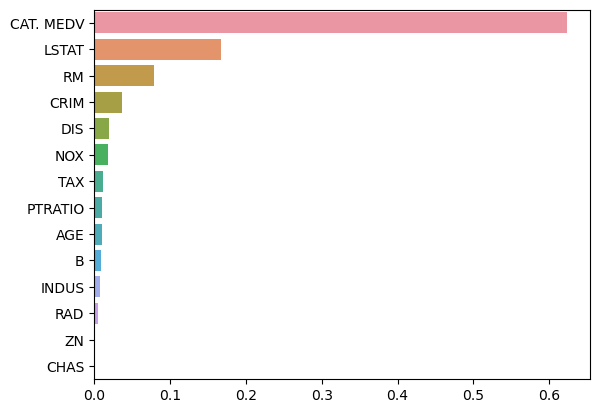

In [39]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y = feature_series.index)

(100, 2)


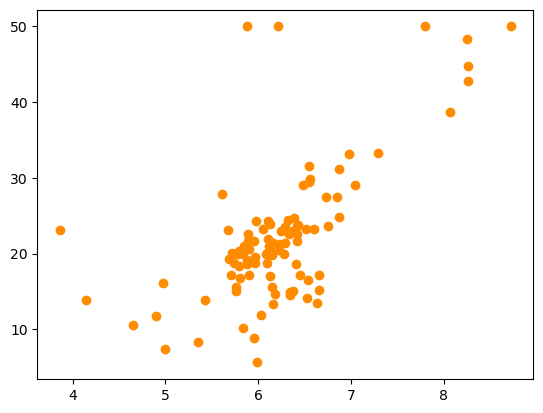

In [40]:
boston_sample = boston[['RM','PRICE']]
boston_sample = boston_sample.sample(n=100,random_state=0)
print(boston_sample.shape)
plt.figure()
plt.scatter(boston_sample.RM, boston_sample.PRICE, c ="darkorange")

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression
# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2,7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5 ~ 8.5 까지의 100개 데이터 세트로 생성.
X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

# 보스턴 주택 가격 데이터에서 시각화를 위헤 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = boston_sample['RM'].values.reshape(-1,1)
y_target = boston_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_1r = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

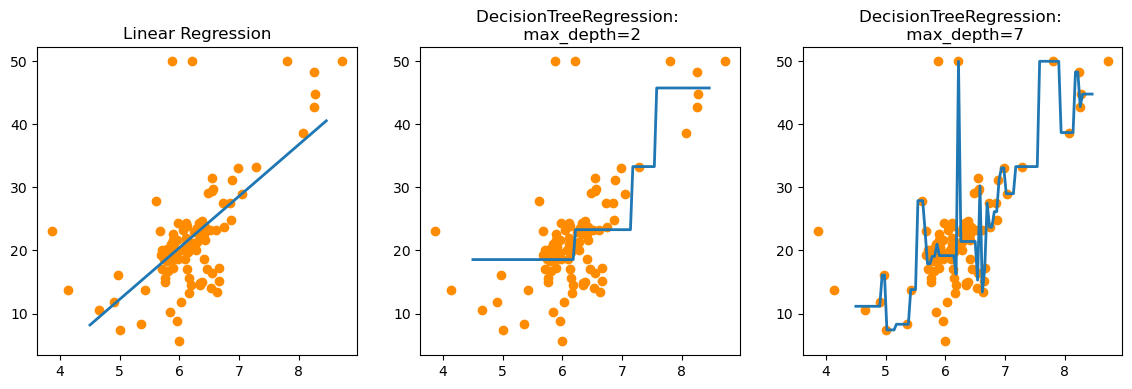

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X 축 값을 4.5 ~ 8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(boston_sample.RM, boston_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_1r, label = "linear", linewidth = 2)

#DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('DecisionTreeRegression: \n max_depth=2')
ax2.scatter(boston_sample.RM, boston_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3",linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('DecisionTreeRegression: \n max_depth=7')
ax3.scatter(boston_sample.RM, boston_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

### 회귀 실습 - 자전거 대여 수요 예측

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

bike_df = pd.read_csv('bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [44]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [45]:
# 문자열을 datetime 타입으로 변경.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [46]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error()를 이용해 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3,random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [49]:
def get_top_error_data(y_test, pred, n_tops=5):
    # DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
# 예측값과 실제 값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff',ascending=False)[:n_tops])
                        
get_top_error_data(y_test,pred,n_tops=5)        

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

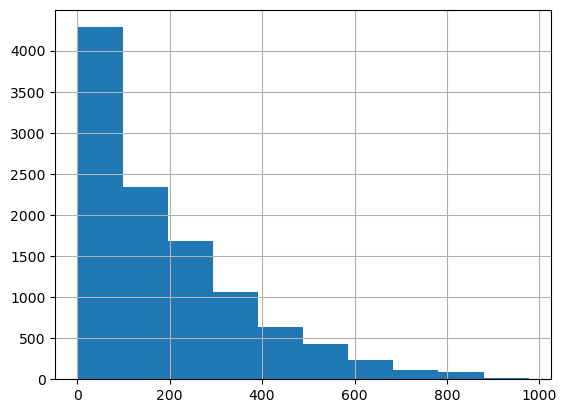

In [50]:
y_target.hist()

<Axes: >

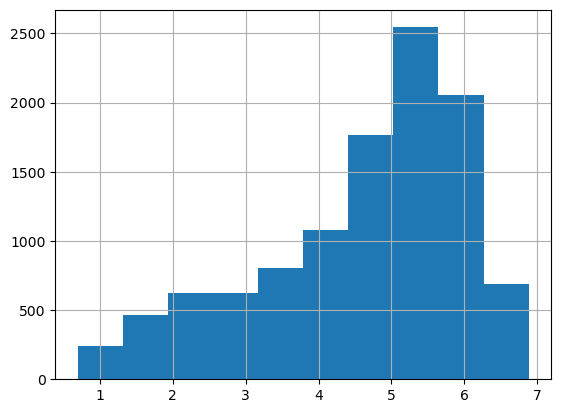

In [51]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [52]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)                                                    

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


<Axes: >

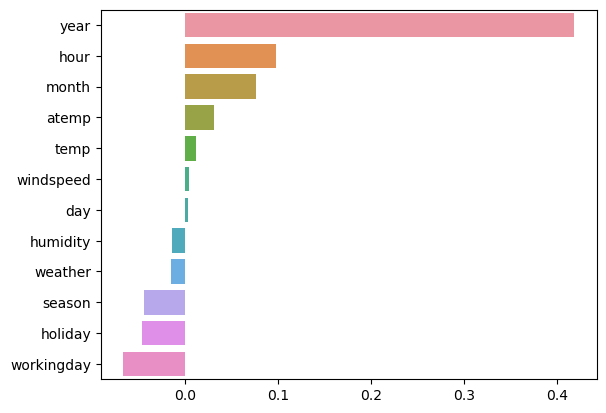

In [53]:
coef = pd.Series(lr_reg.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [54]:
# 'year', 'month','day','hour' 등의 피처를 One-Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','day','hour','holiday','workingday','season','weather'])

In [55]:
# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test,y_train, y_test = train_test_split(X_features_ohe, y_target_log,test_size=0.3,random_state=0)

# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train,X_test,y_train,y_test,is_expm1 = False):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
#end of function get_model_predict

# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg,ridge_reg,lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<Axes: >

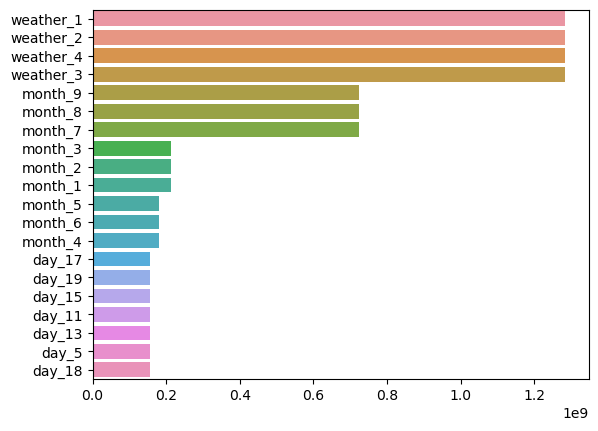

In [56]:
coef = pd.Series(lr_reg.coef_,index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [57]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능ㅇ. ndarray로 변환.
    get_model_predict(model,X_train.values,X_test.values,y_train.values,y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.449, MAE: 31.263
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.336, MAE: 32.746
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


### 회귀 실습 - 캐글 주택 가격 : 고급 회귀 기법 

In [58]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('house_price.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [59]:
print('데이터 세트의 Shape:',house_df.shape)
print('\n전체 피처의 type \n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수:\n',isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

전체 피처의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


<Axes: title={'center': 'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

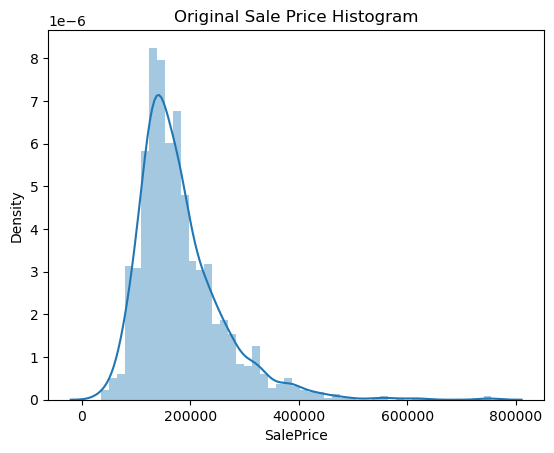

In [60]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

<Axes: title={'center': 'Log Transformed Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

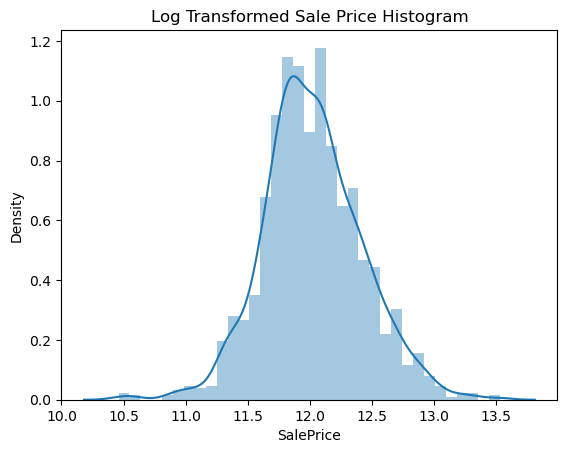

In [61]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [62]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
# 드롭하지 않는 숫자형 Null 칼럼은 평균값으로 대체
house_df.fillna(house_df.mean(),inplace=True)
#Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
print('## Null 피처의 Type : \n',house_df.dtypes[null_column_count.index])

## Null 피처의 Type : 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [63]:
print('get_dummies() 수행 전 데이터 Shape:',house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:',house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n',house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)
## Null 피처의 Type :
 Series([], dtype: object)


In [64]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE:',np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses= []
    for model in models :
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses    

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1,inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2,random_state=156)

#LinearRegression, Ridge, Lasso 학습, 예측 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)                

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.176


[0.13189576579154072, 0.12750846334053154, 0.17628250556471395]

In [66]:
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명
    coef = pd.Series(model.coef_, index = X_features.columns)
    
    # + 상위 10개, - 하위 10개의 회귀 계수를 추출해 반환
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

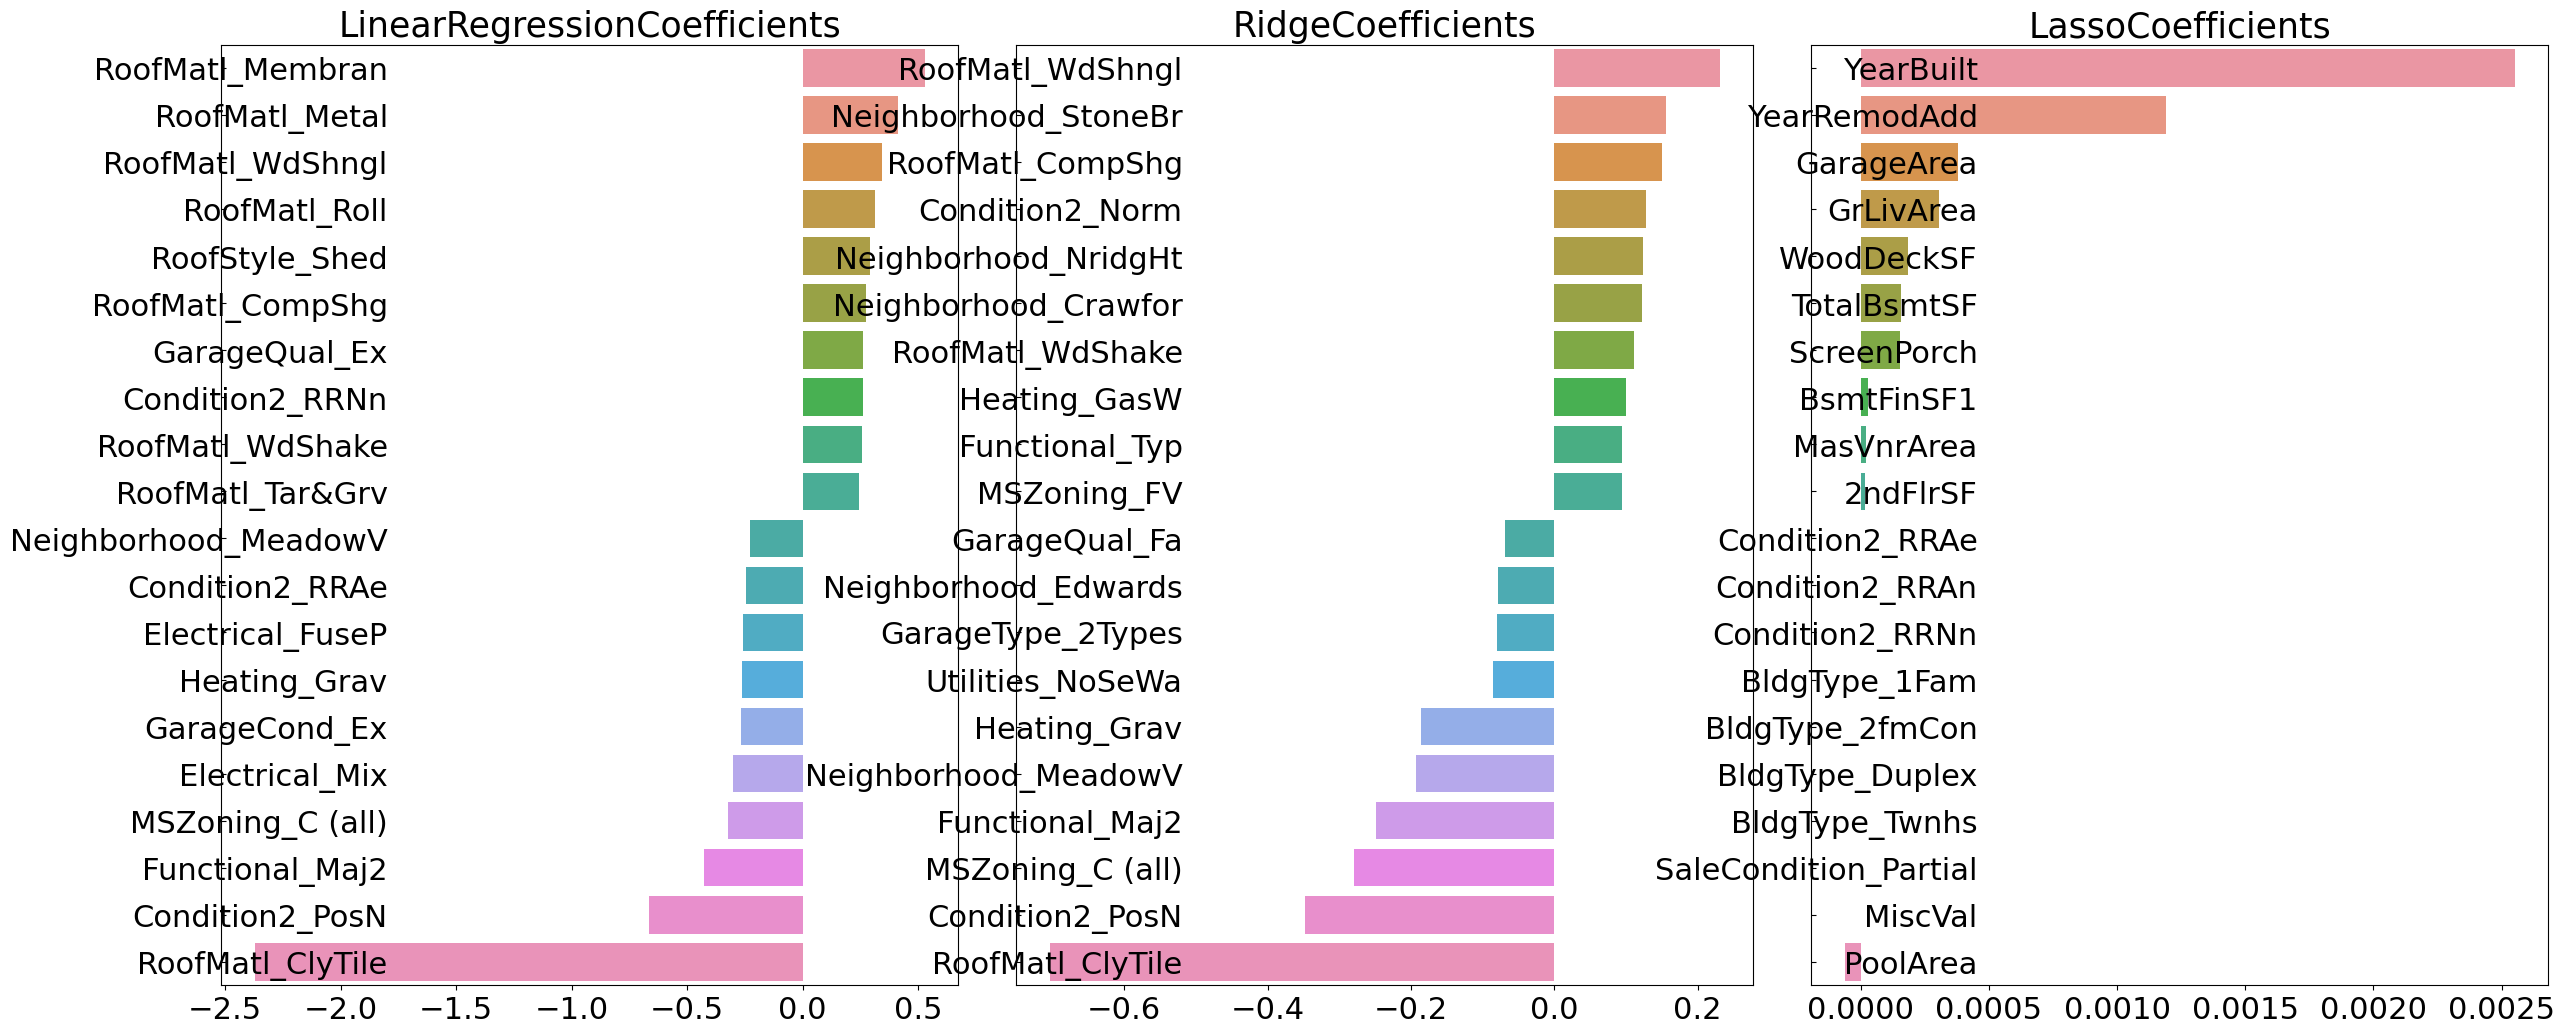

In [67]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig,axs = plt.subplots(figsize=(24,10),nrows=1,ncols=3)
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        # ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+'Coefficients',size=25)
        axs[i_num].tick_params(axis="y",direction="in",pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg,ridge_reg, lasso_reg]
visualize_coefficient(models)

In [68]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    
    for model in models :
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행. 모델별 CV RMSE값과 평균RMSE출력
        rmse_list = np.sqrt(-cross_val_score(model,X_features,y_target,scoring="neg_mean_squared_error",cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__,np.round(rmse_list,3)))
        print('{0} CV 평균 RMSE 값:{1}'.format(model.__class__.__name__,np.round(rmse_avg,3)))
        
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE 값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값:0.155

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값:0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값:0.198


In [69]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,scoring="neg_mean_squared_error",cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__,np.round(rmse,4),grid_model.best_params_))
    
ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값:0.142, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.12


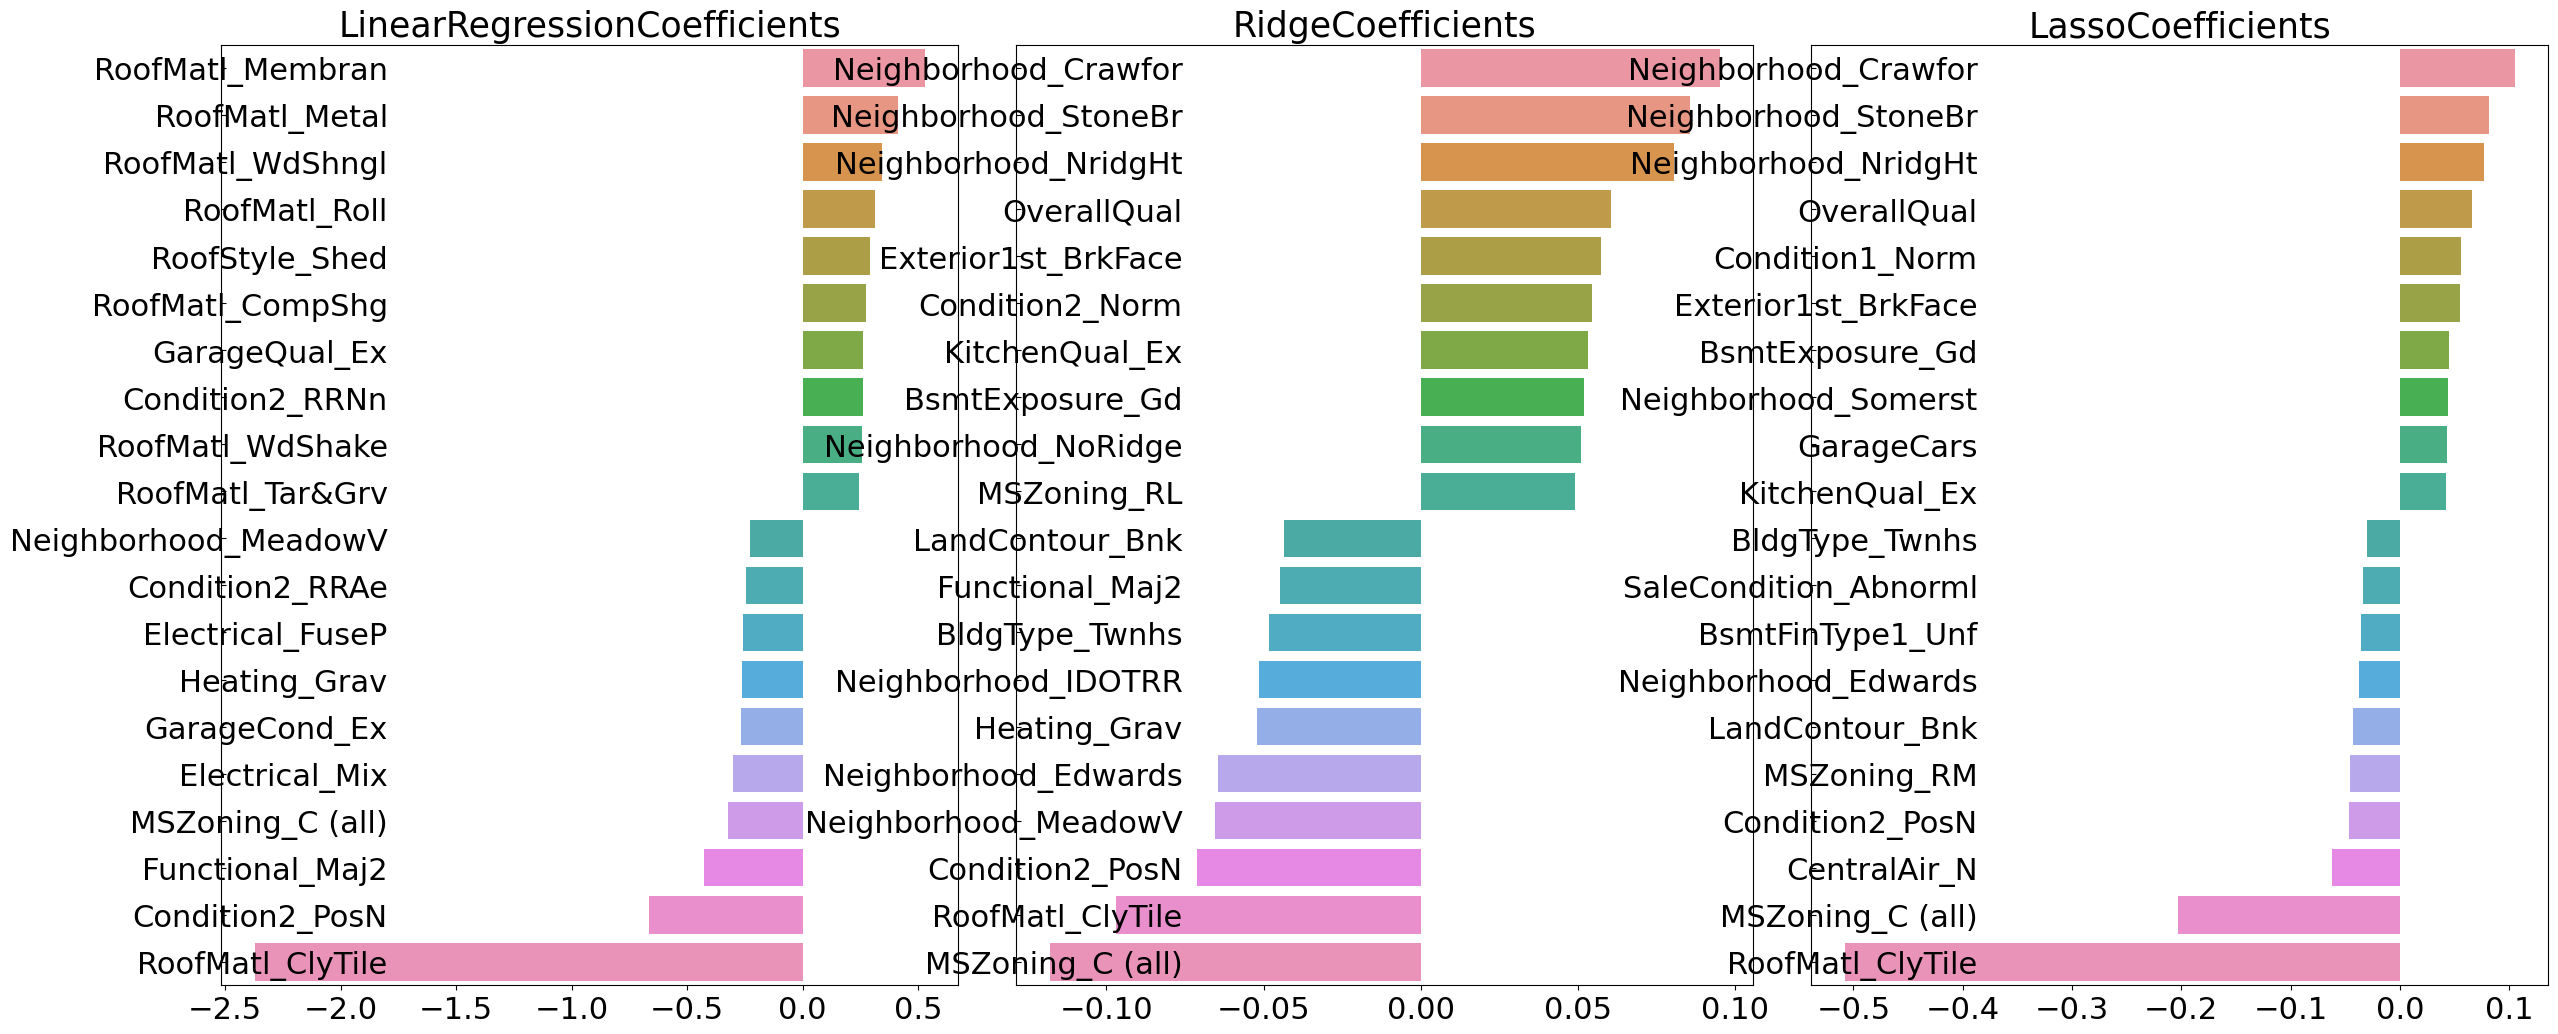

In [70]:
# 앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg , lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

In [71]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew() 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [72]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [73]:
# 왜곡 정도가 높은 피처를 로그 변환했으므로 다시 원-핫 인코딩을 적용하고 피처/타깃 데이터 세트 생성
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,test_size=0.2,random_state=156)

# 피처를 로그 변환한 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.1275, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값:0.1252, 최적 alpha:{'alpha': 0.001}


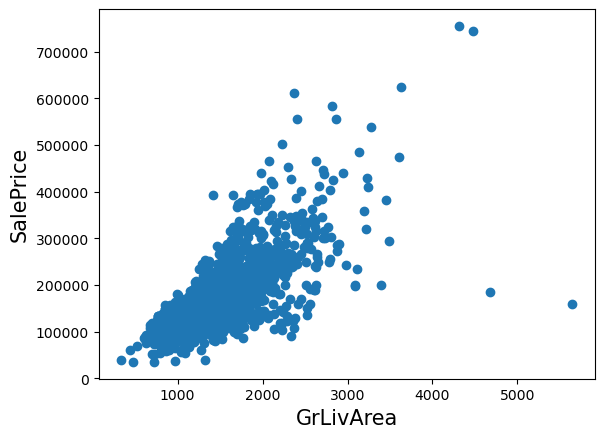

In [74]:
plt.scatter(x=house_df_org['GrLivArea'],y=house_df_org['SalePrice'])
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('GrLivArea',fontsize=15)
plt.show()

In [75]:
# GrLivArea와 SalePrice 모두 로구 변환됐으므로 이를 반영한 조건 생성.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('이상치 레코드 index :',outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape :',house_df_ohe.shape)

# DataFrame의 인덱스를 이용해 이상치 레코드 삭제.
house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 house_df_ohe shape :',house_df_ohe.shape)

이상치 레코드 index : [ 523 1298]
이상치 삭제 전 house_df_ohe shape : (1460, 271)
이상치 삭제 후 house_df_ohe shape : (1458, 271)


In [76]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1,inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features,y_target,test_size=0.2,random_state=156)
ridge_params = {'alpha': [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha': [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값:0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값:0.1122, 최적 alpha:{'alpha': 0.001}


In [77]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg,xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값:0.1171, 최적 alpha:{'n_estimators': 1000}


In [78]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000,learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4,
                        reg_lambda=10, n_jobs=-1)
print_best_params(lgbm_reg,lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값:0.1163, 최적 alpha:{'n_estimators': 1000}


In [79]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test,pred_value)
        rmse = np.sqrt(mse)
        print('{0}모델의 RMSE: {1}'.format(key,rmse))

In [80]:
# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train,y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합':pred,
        'Ridge':ridge_pred,
        'Lasso':lasso_pred}

#최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합모델의 RMSE: 0.10007930884470516
Ridge모델의 RMSE: 0.10345177546603264
Lasso모델의 RMSE: 0.10024170460890032


In [81]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                      colsample_bytree=0.5,subsample = 0.8)
lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate= 0.05, num_leaves=4,
                        subsample=0.6, colsample_bytree = 0.4, reg_lambda = 10, n_jobs=-1)
xgb_reg.fit(X_train,y_train)
lgbm_reg.fit(X_train,y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합':pred,
        'XGBM':xgb_pred,
        'LGBM':lgbm_pred}
get_rmse_pred(preds)

최종 혼합모델의 RMSE: 0.10170077353447762
XGBM모델의 RMSE: 0.10738295638346222
LGBM모델의 RMSE: 0.10382510019327311


In [88]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=True)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__, ' model 시작')
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트:',folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr,y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:,folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성.
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [89]:
# get_stacking_base_datasets()는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base) 모델이 생성한 학습용/테스트용 데이터 반환.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작
	 폴드 세트: 0  시작 
	 폴드 세트: 1  시작 
	 폴드 세트: 2  시작 
	 폴드 세트: 3  시작 
	 폴드 세트: 4  시작 
Lasso  model 시작
	 폴드 세트: 0  시작 
	 폴드 세트: 1  시작 
	 폴드 세트: 2  시작 
	 폴드 세트: 3  시작 
	 폴드 세트: 4  시작 
XGBRegressor  model 시작
	 폴드 세트: 0  시작 
	 폴드 세트: 1  시작 
	 폴드 세트: 2  시작 
	 폴드 세트: 3  시작 
	 폴드 세트: 4  시작 
LGBMRegressor  model 시작
	 폴드 세트: 0  시작 
	 폴드 세트: 1  시작 
	 폴드 세트: 2  시작 
	 폴드 세트: 3  시작 
	 폴드 세트: 4  시작 


In [90]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train),axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

# 최종 메타 모델을 라쏘 모델을 적용.
meta_model_lasso = Lasso(alpha=0.0005)

# 개별 모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:',rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.09770834644749692
